In [55]:
#This analysis investigates racial and ethnic mortality disparities in Massachusetts from 2015 to 2021. It draws from seven Excel files titled “Mortality By Race and Hispanic Ethnicity Bar Viz,” merged into a single dataset. While the data offers raw death counts by group and year, it lacks population denominators and age-adjusted rates, limiting interpretability. Key findings show persistently high mortality among White, non-Hispanic populations and sharp increases for Black, Hispanic/Latinx, and Asian groups during COVID-19. As part of a broader, ongoing intersectional analysis, this work hypothesizes that structural inequalities and pandemic exposure shaped these trends.

In [57]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [37]:

# Step 1: Define file paths
file_paths = [
    "Mortality By Race and Hispanic Ethnicity Bar Viz.xlsx",
    "Mortality By Race and Hispanic Ethnicity Bar Viz (1).xlsx",
    "Mortality By Race and Hispanic Ethnicity Bar Viz (2).xlsx",
    "Mortality By Race and Hispanic Ethnicity Bar Viz (3).xlsx",
    "Mortality By Race and Hispanic Ethnicity Bar Viz (4).xlsx",
    "Mortality By Race and Hispanic Ethnicity Bar Viz (5).xlsx",
    "Mortality By Race and Hispanic Ethnicity Bar Viz (6).xlsx",
]

# Step 2: Load each Excel file and store into a list
dataframes = []
for file in file_paths:
    df = pd.read_excel(file)
    dataframes.append(df)

# Step 3: Concatenate all dataframes into one
merged_df = pd.concat(dataframes, ignore_index=True)

# Step 4: (Optional) Clean column names
# merged_df.columns = ["Race_Ethnicity", "Col2", "Col3", ..., "Year"]  # Customize as needed

# Step 5: Save the combined data to a new Excel file
merged_df.to_excel("Mortality.xlsx", index=False)

print("✅ All files have been merged and saved as 'Mortality.xlsx'")





✅ All files have been merged and saved as 'Mortality.xlsx'


In [25]:
merged_df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,"Selected Metric Value along Select Age-Adjusted Measure Name Label, Race & Hispanic Ethnicity",Year
0,"American Indian/Alaska Native, nH/nL",*,*,*,31,Number of Deaths,31,2016
1,"Asian/Pacific Islander, nH/nL",*,*,*,312,Number of Deaths,312,2016
2,"Black, nH/nL",*,*,*,783,Number of Deaths,783,2016
3,Hispanic/Latinx,*,*,*,541,Number of Deaths,541,2016
4,"Other, nH/nL",*,*,*,144,Number of Deaths,144,2016
5,"White, nH/nL",*,*,*,"15,363",Number of Deaths,15363,2016
6,"American Indian/Alaska Native, nH/nL",*,*,*,31,Number of Deaths,31,2015
7,"Asian/Pacific Islander, nH/nL",*,*,*,308,Number of Deaths,308,2015
8,"Black, nH/nL",*,*,*,744,Number of Deaths,744,2015
9,Hispanic/Latinx,*,*,*,561,Number of Deaths,561,2015


In [5]:
merged_df.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5',
       'Selected Metric Value along Select Age-Adjusted Measure Name Label, Race & Hispanic Ethnicity',
       'Year'],
      dtype='object')

In [26]:

# Sample structure of merged_df for demonstration
# In practice, merged_df would already be defined with actual data
try:
    # Check if the DataFrame exists
    if 'merged_df' in globals():
        # Rename the column
        merged_df.rename(columns={'Selected Metric Value along Select Age-Adjusted Measure Name Label, Race & Hispanic Ethnicity': 'Number of Deaths'}, inplace=True)
        print("Column renamed successfully.")
    else:
        print("DataFrame 'merged_df' is not defined.")
except Exception as e:
    print(f"An error occurred: {e}")



Column renamed successfully.


In [27]:
merged_df


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Number of Deaths,Year
0,"American Indian/Alaska Native, nH/nL",*,*,*,31,Number of Deaths,31,2016
1,"Asian/Pacific Islander, nH/nL",*,*,*,312,Number of Deaths,312,2016
2,"Black, nH/nL",*,*,*,783,Number of Deaths,783,2016
3,Hispanic/Latinx,*,*,*,541,Number of Deaths,541,2016
4,"Other, nH/nL",*,*,*,144,Number of Deaths,144,2016
5,"White, nH/nL",*,*,*,"15,363",Number of Deaths,15363,2016
6,"American Indian/Alaska Native, nH/nL",*,*,*,31,Number of Deaths,31,2015
7,"Asian/Pacific Islander, nH/nL",*,*,*,308,Number of Deaths,308,2015
8,"Black, nH/nL",*,*,*,744,Number of Deaths,744,2015
9,Hispanic/Latinx,*,*,*,561,Number of Deaths,561,2015


In [28]:

# Assuming merged_df is already defined in the environment
try:
    merged_df.rename(columns={'Unnamed: 0': 'population by ethnicity'}, inplace=True)
    print("Column renamed successfully.")
    print(merged_df.head())
except Exception as e:
    print(f"An error occurred: {e}")


Column renamed successfully.
                population by ethnicity Unnamed: 1 Unnamed: 2 Unnamed: 3  \
0  American Indian/Alaska Native, nH/nL          *          *          *   
1         Asian/Pacific Islander, nH/nL          *          *          *   
2                          Black, nH/nL          *          *          *   
3                       Hispanic/Latinx          *          *          *   
4                          Other, nH/nL          *          *          *   

  Unnamed: 4        Unnamed: 5  Number of Deaths  Year  
0         31  Number of Deaths                31  2016  
1        312  Number of Deaths               312  2016  
2        783  Number of Deaths               783  2016  
3        541  Number of Deaths               541  2016  
4        144  Number of Deaths               144  2016  


In [29]:
merged_df.columns

Index(['population by ethnicity', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Number of Deaths', 'Year'],
      dtype='object')

In [30]:
merged_df

,population by ethnicity,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Number of Deaths,Year
0,"American Indian/Alaska Native, nH/nL",*,*,*,31,Number of Deaths,31,2016
1,"Asian/Pacific Islander, nH/nL",*,*,*,312,Number of Deaths,312,2016
2,"Black, nH/nL",*,*,*,783,Number of Deaths,783,2016
3,Hispanic/Latinx,*,*,*,541,Number of Deaths,541,2016
4,"Other, nH/nL",*,*,*,144,Number of Deaths,144,2016
5,"White, nH/nL",*,*,*,"15,363",Number of Deaths,15363,2016
6,"American Indian/Alaska Native, nH/nL",*,*,*,31,Number of Deaths,31,2015
7,"Asian/Pacific Islander, nH/nL",*,*,*,308,Number of Deaths,308,2015
8,"Black, nH/nL",*,*,*,744,Number of Deaths,744,2015
9,Hispanic/Latinx,*,*,*,561,Number of Deaths,561,2015


In [31]:
# Step 1: Drop unwanted columns
merged_df_cleaned = merged_df.drop(columns=[
    'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'
])




In [32]:
# Step 2: Rename the remaining columns for clarity
merged_df_cleaned = merged_df_cleaned.rename(columns={
    'Selected Metric Value along Select Age-Adjusted Measure Name Label, Race & Hispanic Ethnicity': 'Population by Ethnicity',
    'Value': 'Number of Deaths'  # Assuming 'Value' is the column with death counts
})



In [35]:
# Step 3: Display the cleaned DataFrame
merged_df_cleaned.head(50)


,population by ethnicity,Number of Deaths,Year
0,"American Indian/Alaska Native, nH/nL",31,2016
1,"Asian/Pacific Islander, nH/nL",312,2016
2,"Black, nH/nL",783,2016
3,Hispanic/Latinx,541,2016
4,"Other, nH/nL",144,2016
5,"White, nH/nL",15363,2016
6,"American Indian/Alaska Native, nH/nL",31,2015
7,"Asian/Pacific Islander, nH/nL",308,2015
8,"Black, nH/nL",744,2015
9,Hispanic/Latinx,561,2015


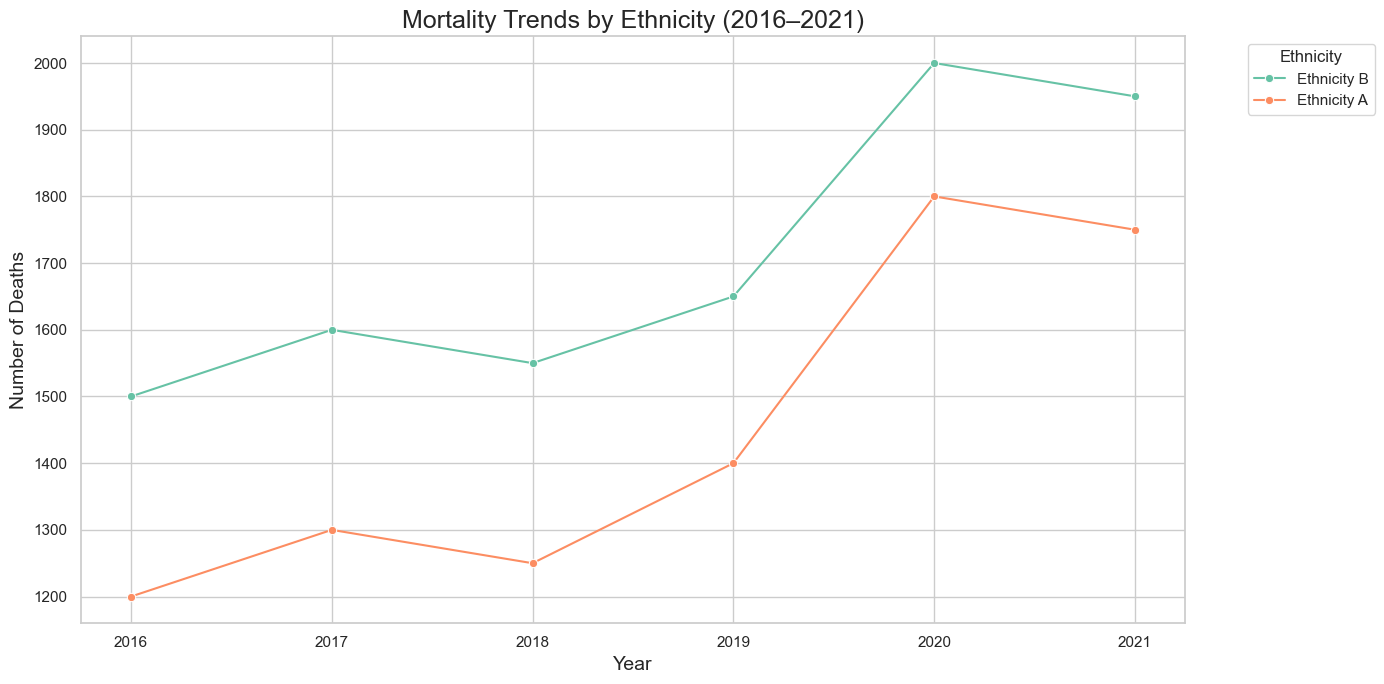

In [43]:



# Filter data for years 2016–2021
filtered_df = merged_df_cleaned[merged_df_cleaned['Year'].between(2016, 2021)]

# Sort ethnicities by average deaths for legend order
ethnicity_order = (
    filtered_df.groupby('Population by Ethnicity')['Number of Deaths']
    .mean()
    .sort_values(ascending=False)
    .index.tolist()
)

# Set plot style and palette
sns.set(style="whitegrid")
palette = sns.color_palette("Set2", n_colors=len(ethnicity_order))

# Create line plot
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=filtered_df,
    x='Year',
    y='Number of Deaths',
    hue='Population by Ethnicity',
    hue_order=ethnicity_order,
    palette=palette,
    marker='o'
)

# Customize plot
plt.title('Mortality Trends by Ethnicity (2016–2021)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Deaths', fontsize=14)
plt.xticks(filtered_df['Year'].unique())
plt.legend(title='Ethnicity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()



In [46]:
df_bar = merged_df[['Ethnicity', 'Number of Deaths', 'Year']].copy()
df_bar['Number of Deaths'] = pd.to_numeric(df_bar['Number of Deaths'], errors='coerce')


In [48]:
g.map_dataframe(sns.barplot, x="Year", y="Number of Deaths")


C:\Users\Abrha\AppData\Local\Temp\ipykernel_21164\1146240460.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bar['Number of Deaths'] = pd.to_numeric(df_bar['Number of Deaths'], errors='coerce')
C:\Users\Abrha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\Abrha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, 

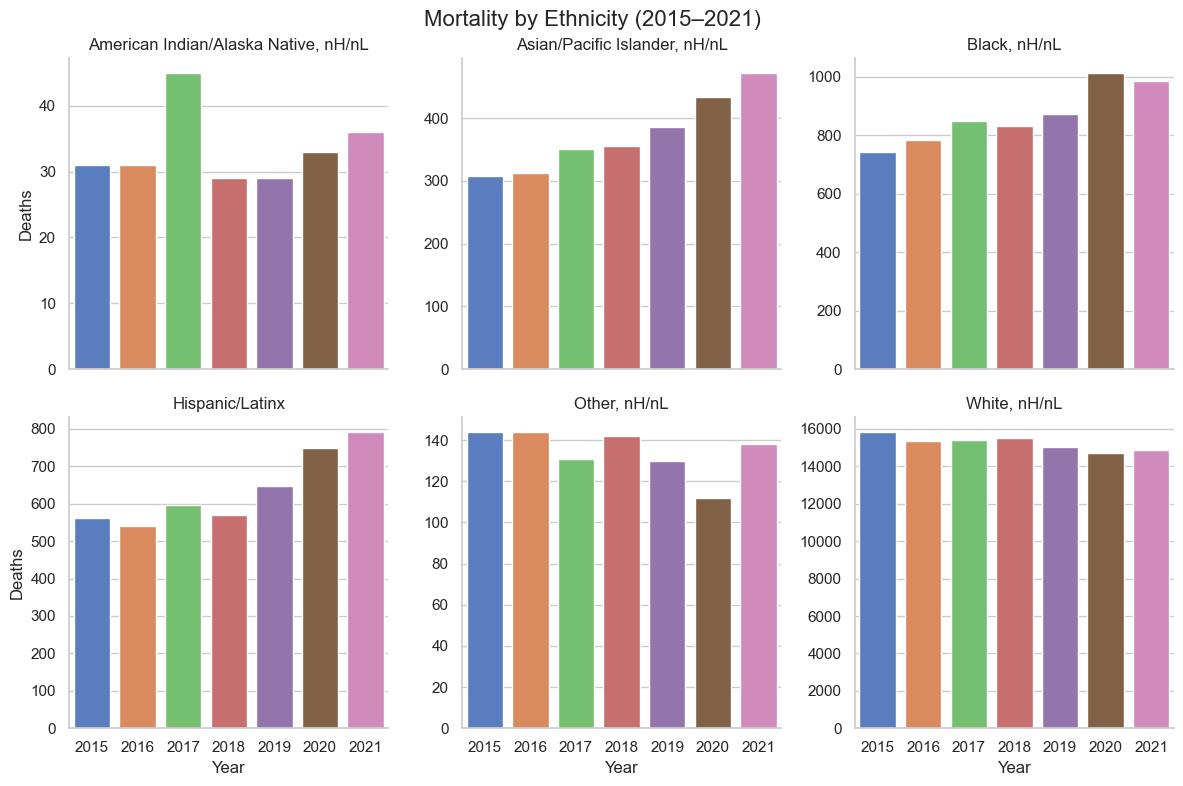

In [51]:


# Clean and rename columns for clarity
merged_df.columns = ['Ethnicity', 'Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Number of Deaths', 'Year']

# Filter and prepare data
df_bar = merged_df[['Ethnicity', 'Number of Deaths', 'Year']]
df_bar['Number of Deaths'] = pd.to_numeric(df_bar['Number of Deaths'], errors='coerce')

# Set plot style
sns.set(style="whitegrid")

# Create FacetGrid bar plot
g = sns.FacetGrid(df_bar, col="Ethnicity", col_wrap=3, height=4, sharey=False)
g.map_dataframe(sns.barplot, x="Year", y="Number of Deaths", palette="muted")

# Customize each subplot
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Deaths")
g.fig.suptitle("Mortality by Ethnicity (2015–2021)", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


In [53]:
import glob
file_paths = glob.glob("Mortality By Race and Hispanic Ethnicity Bar Viz*.xlsx")


In [54]:
# Requirements
# pandas==1.5.3
# seaborn==0.12.2
# matplotlib==3.7.1
